In [1]:
import numpy as np
import pandas as pd

## Fixed preference cost

In [2]:
fixed_family_cost = np.array([0, 50, 50, 100, 200, 200, 300, 300, 400, 500, 500])
print(len(fixed_family_cost), fixed_family_cost)

11 [  0  50  50 100 200 200 300 300 400 500 500]


In [3]:
fixed_person_cost = np.array([0, 0, 9, 9, 9, 18, 18, 36, 36, 36+199, 36+398])
print(len(fixed_person_cost), fixed_person_cost)

11 [  0   0   9   9   9  18  18  36  36 235 434]


In [4]:
# array of preference cost per family
# preference_cost_per_family[n_people, i_choice]
preference_cost_per_family = (
    fixed_family_cost.reshape(1, -1) +
    np.arange(0, 9).reshape(-1, 1) * fixed_person_cost.reshape(1, -1)
)
print(preference_cost_per_family.shape)
preference_cost_per_family

(9, 11)


array([[   0,   50,   50,  100,  200,  200,  300,  300,  400,  500,  500],
       [   0,   50,   59,  109,  209,  218,  318,  336,  436,  735,  934],
       [   0,   50,   68,  118,  218,  236,  336,  372,  472,  970, 1368],
       [   0,   50,   77,  127,  227,  254,  354,  408,  508, 1205, 1802],
       [   0,   50,   86,  136,  236,  272,  372,  444,  544, 1440, 2236],
       [   0,   50,   95,  145,  245,  290,  390,  480,  580, 1675, 2670],
       [   0,   50,  104,  154,  254,  308,  408,  516,  616, 1910, 3104],
       [   0,   50,  113,  163,  263,  326,  426,  552,  652, 2145, 3538],
       [   0,   50,  122,  172,  272,  344,  444,  588,  688, 2380, 3972]])

### Fmaily data
Family choice preference cost

In [5]:
family_data = pd.read_csv('../input/family_data.csv')

In [6]:
n_people = family_data['n_people'].values

In [7]:
choices = family_data.loc[:, ['choice_'+str(i) for i in range(10)]].values

In [8]:
family_data.head()

,family_id,choice_0,choice_1,choice_2,choice_3,choice_4,choice_5,choice_6,choice_7,choice_8,choice_9,n_people
0,0,52,38,12,82,33,75,64,76,10,28,4
1,1,26,4,82,5,11,47,38,6,66,61,4
2,2,100,54,25,12,27,82,10,89,80,33,3
3,3,2,95,1,96,32,6,40,31,9,59,2
4,4,53,1,47,93,26,3,46,16,42,39,4


In [9]:
print(len(n_people), n_people)

5000 [4 4 3 ... 6 5 4]


In [10]:
print(choices.shape, choices)

(5000, 10) [[ 52  38  12 ...  76  10  28]
 [ 26   4  82 ...   6  66  61]
 [100  54  25 ...  89  80  33]
 ...
 [ 32  66  54 ...  81   3   7]
 [ 67  92   4 ...  12  26  70]
 [ 13  11  25 ...  39  18  47]]


### family id, choice to cost

In [11]:
# table from [family_id, choice] to preference cost
family_id_choice_to_pref_cost = (
    fixed_family_cost.reshape(1, -1) +
    n_people.reshape(-1, 1) * fixed_person_cost.reshape(1, -1)
)

In [12]:
family_id_choice_to_pref_cost

array([[   0,   50,   86, ...,  544, 1440, 2236],
       [   0,   50,   86, ...,  544, 1440, 2236],
       [   0,   50,   77, ...,  508, 1205, 1802],
       ...,
       [   0,   50,  104, ...,  616, 1910, 3104],
       [   0,   50,   95, ...,  580, 1675, 2670],
       [   0,   50,   86, ...,  544, 1440, 2236]])

In [13]:
choices

array([[ 52,  38,  12, ...,  76,  10,  28],
       [ 26,   4,  82, ...,   6,  66,  61],
       [100,  54,  25, ...,  89,  80,  33],
       ...,
       [ 32,  66,  54, ...,  81,   3,   7],
       [ 67,  92,   4, ...,  12,  26,  70],
       [ 13,  11,  25, ...,  39,  18,  47]])

In [14]:
np.repeat(family_id_choice_to_pref_cost[:, [-1]], 101, axis=1)

array([[2236, 2236, 2236, ..., 2236, 2236, 2236],
       [2236, 2236, 2236, ..., 2236, 2236, 2236],
       [1802, 1802, 1802, ..., 1802, 1802, 1802],
       ...,
       [3104, 3104, 3104, ..., 3104, 3104, 3104],
       [2670, 2670, 2670, ..., 2670, 2670, 2670],
       [2236, 2236, 2236, ..., 2236, 2236, 2236]])

In [15]:
family_id_choice_to_pref_cost[2, :-1]

array([   0,   50,   77,  127,  227,  254,  354,  408,  508, 1205])

### family id, days to cost

In [16]:
# table from [family_id, days] to preference cost
family_id_days_to_pref_cost = np.repeat(family_id_choice_to_pref_cost[:, [-1]], 101, axis=1)
for f in range(len(family_id_days_to_pref_cost)):
    family_id_days_to_pref_cost[f, choices[f]] = family_id_choice_to_pref_cost[f, :-1]

# the zero day is not legal, put a huge number here to avoid bug
family_id_days_to_pref_cost[:, 0] = 99999

In [17]:
family_id_days_to_pref_cost

array([[99999,  2236,  2236, ...,  2236,  2236,  2236],
       [99999,  2236,  2236, ...,  2236,  2236,  2236],
       [99999,  1802,  1802, ...,  1802,  1802,     0],
       ...,
       [99999,  3104,  3104, ...,  3104,  3104,  3104],
       [99999,   390,  2670, ...,  2670,  2670,  2670],
       [99999,  2236,  2236, ...,  2236,  2236,  2236]])

In [18]:
family_id_days_to_pref_cost.shape

(5000, 101)

In [19]:
family_data.loc[2019]

family_id    2019
choice_0       94
choice_1       22
choice_2       13
choice_3       81
choice_4       88
choice_5       43
choice_6       16
choice_7       25
choice_8       27
choice_9       95
n_people        6
Name: 2019, dtype: int64

In [20]:
print(family_id_days_to_pref_cost[2019, 94], preference_cost_per_family[6, 0])
print(family_id_days_to_pref_cost[2019, 95], preference_cost_per_family[6, 9])

0 0
1910 1910


## Evaluate preference cost

In [21]:
np.array([[1,2,3], [4,5,6], [7,8,9], [10,11,12]])[np.arange(4), np.array([2,2,1,1])]

array([ 3,  6,  8, 11])

In [22]:
len(family_id_days_to_pref_cost)

5000

In [23]:
def cal_total_preference(assigned_day):
    return np.sum(family_id_days_to_pref_cost[np.arange(5000), assigned_day])

In [24]:
sample_submission = pd.read_csv('../input/sample_submission.csv')

In [25]:
assigned_day = sample_submission['assigned_day']

In [26]:
cal_total_preference(assigned_day)

10639591

## Family on day cost

In [27]:
family_data

,family_id,choice_0,choice_1,choice_2,choice_3,choice_4,choice_5,choice_6,choice_7,choice_8,choice_9,n_people
0,0,52,38,12,82,33,75,64,76,10,28,4
1,1,26,4,82,5,11,47,38,6,66,61,4
2,2,100,54,25,12,27,82,10,89,80,33,3
3,3,2,95,1,96,32,6,40,31,9,59,2
4,4,53,1,47,93,26,3,46,16,42,39,4
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,16,1,66,33,18,70,56,46,86,60,4
4996,4996,88,66,20,17,26,54,81,91,59,48,2
4997,4997,32,66,54,17,27,21,74,81,3,7,6
4998,4998,67,92,4,17,53,77,1,12,26,70,5


In [28]:
# get a test case
family_data['assigned_day'] = sample_submission['assigned_day']

In [29]:
family_data.head()

,family_id,choice_0,choice_1,choice_2,choice_3,choice_4,choice_5,choice_6,choice_7,choice_8,choice_9,n_people,assigned_day
0,0,52,38,12,82,33,75,64,76,10,28,4,100
1,1,26,4,82,5,11,47,38,6,66,61,4,99
2,2,100,54,25,12,27,82,10,89,80,33,3,98
3,3,2,95,1,96,32,6,40,31,9,59,2,97
4,4,53,1,47,93,26,3,46,16,42,39,4,96


In [30]:
occupancy = (
    np.concatenate([[0], family_data.groupby('assigned_day')['n_people'].sum().values, [-1]])
)
occupancy[-1] = occupancy[-2]

In [31]:
occupancy.shape

(102,)

In [32]:
occupancy

array([  0, 203, 230, 206, 217, 221, 198, 207, 214, 207, 237, 216, 192,
       205, 210, 206, 200, 212, 188, 201, 216, 209, 214, 198, 209, 207,
       217, 201, 228, 206, 211, 225, 233, 199, 204, 203, 212, 196, 207,
       214, 201, 220, 209, 208, 224, 203, 226, 207, 205, 199, 214, 212,
       199, 213, 213, 210, 201, 198, 215, 195, 211, 227, 205, 222, 219,
       204, 203, 189, 197, 207, 210, 218, 223, 203, 213, 199, 208, 211,
       217, 226, 204, 232, 211, 209, 214, 211, 203, 204, 212, 220, 211,
       237, 207, 197, 210, 203, 233, 204, 209, 203, 206, 206])

In [33]:
np.abs(np.concatenate([np.diff(occupancy[1:-1]), [0]]))

array([27, 24, 11,  4, 23,  9,  7,  7, 30, 21, 24, 13,  5,  4,  6, 12, 24,
       13, 15,  7,  5, 16, 11,  2, 10, 16, 27, 22,  5, 14,  8, 34,  5,  1,
        9, 16, 11,  7, 13, 19, 11,  1, 16, 21, 23, 19,  2,  6, 15,  2, 13,
       14,  0,  3,  9,  3, 17, 20, 16, 16, 22, 17,  3, 15,  1, 14,  8, 10,
        3,  8,  5, 20, 10, 14,  9,  3,  6,  9, 22, 28, 21,  2,  5,  3,  8,
        1,  8,  8,  9, 26, 30, 10, 13,  7, 30, 29,  5,  6,  3,  0])

In [34]:
def cal_total_accounting(occupancy):
    assert len(occupancy) == 102
    occupancy = occupancy[1:-1]
    return np.sum(
        (occupancy - 125) / 400 * 
        occupancy ** (
            0.5 + np.abs(np.concatenate([np.diff(occupancy), [0]])) / 50
        )
    )

In [35]:
cal_total_accounting(occupancy)

1907.4031350226594

In [36]:
def cal_total(assigned_day, occupancy):
    return cal_total_preference(assigned_day) + cal_total_accounting(occupancy)

In [37]:
cal_total(assigned_day, occupancy)

10641498.403135022

## Difference of Exchange Cost

### Precompute accounting cost

In [38]:
301*301

90601

In [39]:
# precomputed accounting penalty
# table from (nd, nd+1) to accounting penalty of the d day
# where nd is the occupancy of the d day
nd_ndp1_to_account_penality = np.array([
    [
        (nd - 125) / 400 * nd ** (0.5 + abs(nd - ndp1) / 50)
        for ndp1 in range(301)
    ] 
    for nd in range(301)
])

In [40]:
nd_ndp1_to_account_penality

array([[-0.00000000e+00, -0.00000000e+00, -0.00000000e+00, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-3.10000000e-01, -3.10000000e-01, -3.10000000e-01, ...,
        -3.10000000e-01, -3.10000000e-01, -3.10000000e-01],
       [-4.47096549e-01, -4.40941239e-01, -4.34870670e-01, ...,
        -2.63304143e+01, -2.66979732e+01, -2.70706630e+01],
       ...,
       [ 4.16316072e+15,  3.71482922e+15,  3.31477861e+15, ...,
         7.46610759e+00,  8.36716954e+00,  9.37697794e+00],
       [ 4.79555148e+15,  4.27883100e+15,  3.81778713e+15, ...,
         8.43020770e+00,  7.52185316e+00,  8.43020770e+00],
       [ 5.52415954e+15,  4.92860244e+15,  4.39725208e+15, ...,
         9.51970597e+00,  8.49339085e+00,  7.57772228e+00]])

In [41]:
import seaborn as sns
import matplotlib.pylab as plt

In [42]:
nd_ndp1_to_account_penality[125:, 125:]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.09123977e-02, 2.80624304e-02, 3.09123977e-02, ...,
        4.71411265e+05, 5.19286901e+05, 5.72024695e+05],
       [6.83949464e-02, 6.20794612e-02, 5.63471383e-02, ...,
        8.82837130e+05, 9.72650165e+05, 1.07160008e+06],
       ...,
       [2.71570454e+09, 2.42324984e+09, 2.16228964e+09, ...,
        7.46610759e+00, 8.36716954e+00, 9.37697794e+00],
       [3.10213423e+09, 2.76787940e+09, 2.46964050e+09, ...,
        8.43020770e+00, 7.52185316e+00, 8.43020770e+00],
       [3.54375000e+09, 3.16169994e+09, 2.82083852e+09, ...,
        9.51970597e+00, 8.49339085e+00, 7.57772228e+00]])

In [43]:
nd_ndp1_to_account_penality.dtype

dtype('float64')

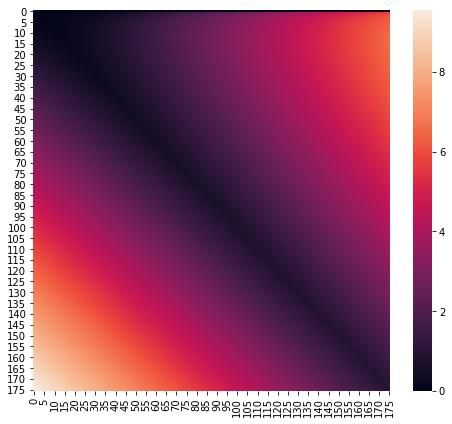

In [44]:
# account penalty for two days with Nd and Nd+1 occupancy
plt.figure(figsize=(8, 7))
ax = sns.heatmap(np.log10(nd_ndp1_to_account_penality[125:, 125:]+1))
plt.show()

### Single move

In [45]:
occupancy

array([  0, 203, 230, 206, 217, 221, 198, 207, 214, 207, 237, 216, 192,
       205, 210, 206, 200, 212, 188, 201, 216, 209, 214, 198, 209, 207,
       217, 201, 228, 206, 211, 225, 233, 199, 204, 203, 212, 196, 207,
       214, 201, 220, 209, 208, 224, 203, 226, 207, 205, 199, 214, 212,
       199, 213, 213, 210, 201, 198, 215, 195, 211, 227, 205, 222, 219,
       204, 203, 189, 197, 207, 210, 218, 223, 203, 213, 199, 208, 211,
       217, 226, 204, 232, 211, 209, 214, 211, 203, 204, 212, 220, 211,
       237, 207, 197, 210, 203, 233, 204, 209, 203, 206, 206])

In [46]:
day0 = 3; day1 = 100

In [47]:
print(occupancy[day0], occupancy[day0+1])
print(occupancy[day1], occupancy[day1+1])

206 217
206 206


In [48]:
day0 = 3; day1 = np.array([4, 100])

In [49]:
print(occupancy[day0], occupancy[day0+1])
print(occupancy[day1], occupancy[day1+1])

206 217
[217 206] [221 206]


In [50]:
nd_ndp1_to_account_penality[occupancy[day0], occupancy[day0+1]]

9.384462996790385

In [51]:
nd_ndp1_to_account_penality[occupancy[day1], occupancy[day1+1]]

array([5.21044099, 2.90642177])

In [52]:
occ_day0 = occupancy[day0]
occ_day0p1 = occupancy[day0+1]
occ_day1 = occupancy[day1]
occ_day1p1 = occupancy[day1+1]

In [53]:
nd_ndp1_to_account_penality[occ_day0, occ_day0p1] + nd_ndp1_to_account_penality[occ_day1, occ_day1p1]

array([14.59490399, 12.29088477])

In [54]:
n = 4  # family size

In [55]:
(
    nd_ndp1_to_account_penality[occ_day0 - n, occ_day0p1] -
    nd_ndp1_to_account_penality[occ_day0, occ_day0p1] + 
    nd_ndp1_to_account_penality[occ_day1 + n, occ_day1p1] - 
    nd_ndp1_to_account_penality[occ_day1, occ_day1p1]
)

array([2.42262873, 5.88209792])

In [56]:
def cal_diff_1_accounting_c(occupancy, day0, day1, n):
    """ Difference in the accounting penalty for moving a family of size n from day0 to day1 
        given the current occupancy at day0.
        (Incorrect when |day0 - day1| = 1)
    """
    occ_day0m1 = occupancy[day0 - 1]
    occ_day0 = occupancy[day0]
    occ_day0p1 = occupancy[day0 + 1]
    occ_day1m1 = occupancy[day1 - 1]
    occ_day1 = occupancy[day1]
    occ_day1p1 = occupancy[day1 + 1]

    diff = 0.
    # difference in day 0 accounting penalty
    if day0 != 1:
        diff += (
            nd_ndp1_to_account_penality[occ_day0m1, occ_day0 - n] -            
            nd_ndp1_to_account_penality[occ_day0m1, occ_day0]
        )
    if day0 != 100:
        diff += (
            nd_ndp1_to_account_penality[occ_day0 - n, occ_day0p1] -
            nd_ndp1_to_account_penality[occ_day0, occ_day0p1]
        )
    else:
        diff += (
            nd_ndp1_to_account_penality[occ_day0 - n, occ_day0 - n] -
            nd_ndp1_to_account_penality[occ_day0, occ_day0]
        )
    # difference in day 1 accounting penalty
    if day1 != 1:
        diff += (
            nd_ndp1_to_account_penality[occ_day1m1, occ_day1 + n] -            
            nd_ndp1_to_account_penality[occ_day1m1, occ_day1]
        )
    if day1 != 100:
        diff += (
            nd_ndp1_to_account_penality[occ_day1 + n, occ_day1p1] -
            nd_ndp1_to_account_penality[occ_day1, occ_day1p1]
        )
    else:
        diff += (
            nd_ndp1_to_account_penality[occ_day1 + n, occ_day1 + n] -
            nd_ndp1_to_account_penality[occ_day1, occ_day1]
        )
    return diff

In [57]:
def cal_diff_1_accounting_b(occupancy, day0, day1, n):
    """ Incorrect version
        Difference in the accounting penalty for moving a family of size n from day0 to day1 
        given the current occupancy at day0.
    """
    # if dayi = 0, then dayi - 1
    occ_day0m1 = occupancy[day0 - 1]
    occ_day0 = occupancy[day0]
    occ_day0p1 = occupancy[day0 + 1]
    occ_day1m1 = occupancy[day1 - 1]
    occ_day1 = occupancy[day1]
    occ_day1p1 = occupancy[day1 + 1]
    return (
        # difference in day 0 accounting penalty
        (
            nd_ndp1_to_account_penality[occ_day0m1, occ_day0 - n] +
            nd_ndp1_to_account_penality[occ_day0 - n, occ_day0p1]
        ) -
        (
            nd_ndp1_to_account_penality[occ_day0m1, occ_day0] +
            nd_ndp1_to_account_penality[occ_day0, occ_day0p1]
        ) +
        # difference in day 1 accounting penalty
        (
            nd_ndp1_to_account_penality[occ_day1m1, occ_day1 + n] +
            nd_ndp1_to_account_penality[occ_day1 + n, occ_day1p1]
        ) - 
        (
            nd_ndp1_to_account_penality[occ_day1m1, occ_day1] +
            nd_ndp1_to_account_penality[occ_day1, occ_day1p1]
        )
    )

In [58]:
def cal_diff_1_accounting(occupancy, day0, day1, n):
    """ Difference in the accounting penalty for moving a family of size n from day0 to day1 
        given the current occupancy at day0.
    """
    # set of days that might affect their accounting penalties
    day_set = set([day0 - 1, day0, day1 - 1, day1])
    
    diff = 0.
    
    for day in day_set:
        if day == 100:
            diff -= nd_ndp1_to_account_penality[occupancy[day], occupancy[day]]
        elif day != 0:
            diff -= nd_ndp1_to_account_penality[occupancy[day], occupancy[day+1]]

    occupancy[day0] -= n
    occupancy[day1] += n
    
    for day in day_set:
        if day == 100:
            diff += nd_ndp1_to_account_penality[occupancy[day], occupancy[day]]
        elif day != 0:
            diff += nd_ndp1_to_account_penality[occupancy[day], occupancy[day+1]]

    occupancy[day0] += n
    occupancy[day1] -= n
    return diff

In [59]:
cal_diff_1_accounting(occupancy, 3, 4, 5)

53.544854468471506

In [60]:
cal_diff_1_accounting_b(occupancy, 3, 4, 5)

49.864554903796915

In [61]:
cal_diff_1_accounting_c(occupancy, 3, 4, 5)

49.864554903796915

In [62]:
cal_diff_1_accounting(occupancy, 1, 25, 5)

24.07056928305616

In [63]:
cal_diff_1_accounting_b(occupancy, 1, 25, 5)

24.070569283056162

In [64]:
cal_diff_1_accounting_c(occupancy, 1, 25, 5)

24.07056928305616

In [65]:
cal_diff_1_accounting(occupancy, 1, 100, 5)

29.70110656637929

In [66]:
cal_diff_1_accounting_b(occupancy, 1, 100, 5)

31.91149754946615

In [67]:
cal_diff_1_accounting_c(occupancy, 1, 100, 5)

29.70110656637929

In [87]:
def cal_diff_1(family_id, occupancy, day0, day1):
    """ Difference in the toal cost for moving the family family_id from day0 to day1 
        given the current occupancy at day0.
        Note: family_id, day0, or day1 don't support vertorization
    """
    return (
        family_id_days_to_pref_cost[family_id, day1] - family_id_days_to_pref_cost[family_id, day0]
        + cal_diff_1_accounting(occupancy, day0, day1, n_people[family_id])
    )

In [65]:
assigned_day[3]

97

In [66]:
choices[3]

array([ 2, 95,  1, 96, 32,  6, 40, 31,  9, 59])

In [67]:
n_people[3]

2

In [68]:
family_id_days_to_pref_cost[3, 59]

970

In [110]:
cal_single_diff(3, occupancy, 97, 96)

-1182.264346233859

#### Debug - Total accounting penalty using the table

In [70]:
np.sum(nd_ndp1_to_account_penality[occupancy[1:-1], occupancy[2:]])

1907.4031350226594

In [71]:
cal_total_accounting(occupancy)

1907.4031350226594

In [72]:
def cal_family_on_day(assigned_day):
    N_days = 100
    # family_on_day
    family_on_day = [set() for _ in range(N_days+1)] # 0 is empty set
    for i, day in enumerate(assigned_day):
        family_on_day[day].add(i)
    return family_on_day

In [73]:
family_on_day = cal_family_on_day(assigned_day)

### Unit test

In [74]:
from util_events import move_family

In [75]:
from util_io import read_conf

In [89]:
assigned_day, family_on_day, occupancy = read_conf('../input/sample_submission.csv')

Read config completed.


In [90]:
assigned_day_o, occupancy_o, family_on_day_o = assigned_day.copy(), occupancy.copy(), family_on_day.copy()

In [91]:
cal_total(assigned_day_o, occupancy_o)

10641498.403135022

In [92]:
list(family_on_day[1])[0]

899

In [93]:
ifamily = 899 # 3

In [94]:
day0 = assigned_day[ifamily]
day0

1

In [95]:
choices[ifamily]

array([81, 67, 11, 82, 12,  6, 26, 89, 25, 28])

In [96]:
day1 = 100 # choices[ifamily][2]
day1

100

In [97]:
cal_single_diff(ifamily, occupancy, day0, day1)

22.72275768640914

In [98]:
move_family(ifamily, n_people[ifamily], day0, day1, assigned_day, family_on_day, occupancy)

In [99]:
cal_total(assigned_day, occupancy) - cal_total(assigned_day_o, occupancy_o)

22.722757687792182

In [100]:
occupancy[[0,1,100,101]]

array([125, 199, 210, 210], dtype=int32)

### Vectorize

In [90]:
def cal_diff_1_accounting_vec_c(occupancy, day0, day1, n):
    """ (Incorrect version)
        Difference in the accounting penalty for moving a family of size n from day0 to day1 
        given the current occupancy at day0.
    """
    occ_day0m1 = occupancy[day0 - 1]
    occ_day0 = occupancy[day0]
    occ_day0p1 = occupancy[day0 + 1]
    occ_day1m1 = occupancy[day1 - 1]
    occ_day1 = occupancy[day1]
    occ_day1p1 = occupancy[day1 + 1]

    return (
        # difference in day 0 accounting penalty
        (
            nd_ndp1_to_account_penality[occ_day0m1, occ_day0 - n] -            
            nd_ndp1_to_account_penality[occ_day0m1, occ_day0]
        ) * (day0 != 1) +
        np.where(
            day0 != 100,
            (
                nd_ndp1_to_account_penality[occ_day0 - n, occ_day0p1] -
                nd_ndp1_to_account_penality[occ_day0, occ_day0p1]
            ),
            (
                nd_ndp1_to_account_penality[occ_day0 - n, occ_day0 - n] -
                nd_ndp1_to_account_penality[occ_day0, occ_day0]
            )
        ) +
        # difference in day 1 accounting penalty
        (
            nd_ndp1_to_account_penality[occ_day1m1, occ_day1 + n] -            
            nd_ndp1_to_account_penality[occ_day1m1, occ_day1]
        ) * (day1 != 1) +
        np.where(
            day1 != 100,
            (
                nd_ndp1_to_account_penality[occ_day1 + n, occ_day1p1] -
                nd_ndp1_to_account_penality[occ_day1, occ_day1p1]
            ),
            (
                nd_ndp1_to_account_penality[occ_day1 + n, occ_day1 + n] -
                nd_ndp1_to_account_penality[occ_day1, occ_day1]
            )
        )
    )

In [74]:
def cal_diff_1_accounting_vec(occupancy, day0, day1, n):
    """ Difference in the accounting penalty for moving a family of size n from day0 to day1 
        given the current occupancy at day0.
    """
    return np.array([cal_diff_1_accounting(occupancy, day0, d, n) for d in day1])

In [71]:
cal_diff_1_accounting(occupancy, 3, 4, 5)

53.544854468471506

In [75]:
cal_diff_1_accounting_vec(occupancy, 3, [4], 5)

array([53.54485447])

In [72]:
cal_diff_1_accounting_vec_c(occupancy, 3, 4, 5)

49.864554903796915

In [126]:
cal_diff_1_accounting(occupancy, 1, 25, 5)

34.41808470504391

In [127]:
cal_diff_1_accounting_vec(occupancy, 1, 25, 5)

34.41808470504391

In [128]:
cal_diff_1_accounting(occupancy, 1, 100, 5)

41.471008805703306

In [129]:
cal_diff_1_accounting_vec(occupancy, 1, 100, 5)

41.471008805703306

In [76]:
print([cal_diff_1_accounting(occupancy, x, 3, 5) for x in np.array([4, 100, 1])])

[-25.528861707265765, -26.761807068563268, 0.6410874900291628]


In [82]:
#cal_diff_1_accounting_vec(occupancy, np.array([4, 100, 1]), 3, 5)

In [78]:
print([cal_diff_1_accounting(occupancy, 3, x, 5) for x in np.array([4, 100, 1])])

[53.544854468471506, 47.342101007792806, 26.819844578884343]


In [79]:
cal_diff_1_accounting_vec(occupancy, 3, np.array([4, 100, 1]), 5)

array([53.54485447, 47.34210101, 26.81984458])

In [80]:
print([cal_diff_1_accounting(occupancy, 3, 4, x) for x in np.array([2,3,4,5])])

[16.786448107698256, 27.139123081919248, 39.05375057535652, 53.544854468471506]


In [83]:
#cal_diff_1_accounting_vec(occupancy, 3, 4, np.array([2,3,4,5]))

In [84]:
def cal_diff_1_vec(family_id, occupancy, day0, day1):
    """ Difference in the toal cost for moving the family family_id from day0 to day1 
        given the current occupancy at day0.
        Note: only day1 support vertorization  
    """
    return (
        family_id_days_to_pref_cost[family_id, day1] - family_id_days_to_pref_cost[family_id, day0]
        + cal_diff_1_accounting_vec(occupancy, day0, day1, n_people[family_id])
    )

In [146]:
family_id_days_to_pref_cost[3, [1,2,3]]

array([  68,    0, 1368])

In [85]:
cal_diff_1_vec(3, occupancy, 97, np.array([1, 2, 3, 100]))

array([-1283.30163938, -1316.69993139,    12.50793924,    25.64824765])

In [88]:
print([cal_diff_1(3, occupancy, 97, x) for x in np.array([1, 2, 3, 100])])

[-1283.3016393839462, -1316.6999313946365, 12.507939241063339, 25.648247652016874]


In [89]:
cal_diff_1_vec(3, occupancy, 97, np.array([1,]))

array([-1283.30163938])

### Multiple moves

#### Accounting

In [92]:
def cal_diff_n_accounting(occupancy, day0s, day1s, family_sizes):
    """ Difference in the accounting penalty for moving a list of families 
        (each with sizes family_sizes) from day0s to day1s correspondingly
        given the occupancy before move.
        occupancy [np.array]: occupancy array before move
        days0s [np.array]: day0 of each family
        days1s [np.array]: day1 of each family
        family_sizes [np.array]: family sizes of each family
    """
    # set of days that might affect their accounting penalties
    day_set = set(day0s - 1) | set(day0s) | set(day1s - 1) | set(day1s)
    
    diff = 0.
    
    for day in day_set:
        if day == 100:
            diff -= nd_ndp1_to_account_penality[occupancy[day], occupancy[day]]
        elif day != 0:
            diff -= nd_ndp1_to_account_penality[occupancy[day], occupancy[day+1]]
    
    for day0, day1, n in zip(day0s, day1s, family_sizes):
        occupancy[day0] -= n
        occupancy[day1] += n
    
    for day in day_set:
        if day == 100:
            diff += nd_ndp1_to_account_penality[occupancy[day], occupancy[day]]
        elif day != 0:
            diff += nd_ndp1_to_account_penality[occupancy[day], occupancy[day+1]]

    for day0, day1, n in zip(day0s, day1s, family_sizes):
        occupancy[day0] += n
        occupancy[day1] -= n
    return diff

In [94]:
print([cal_diff_1_accounting(occupancy, x, 3, 5) for x in np.array([4, 100, 1])])
print([cal_diff_n_accounting(occupancy, np.array([x]), np.array([3]), np.array([5])) for x in np.array([4, 100, 1])])

[-25.528861707265765, -26.761807068563268, 0.6410874900291628]
[-25.528861707265765, -26.761807068563268, 0.6410874900291628]


In [96]:
%timeit cal_diff_1_accounting(occupancy, 100, 3, 5)

6.36 µs ± 198 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [97]:
%timeit cal_diff_n_accounting(occupancy, np.array([100]), np.array([3]), np.array([5]))

18.4 µs ± 776 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [100]:
cal_diff_n_accounting(occupancy, np.array([100, 20]), np.array([20, 100]), np.array([5, 6]))

-1.670626553311421

In [101]:
cal_diff_n_accounting(occupancy, np.array([100, 20]), np.array([20, 100]), np.array([5, 4]))

1.9680442633509738

In [102]:
cal_diff_n_accounting(occupancy, np.array([100, 20]), np.array([20, 100]), np.array([5, 5]))

-1.7763568394002505e-15

In [103]:
cal_diff_n_accounting(occupancy, np.array([100, 1]), np.array([1, 100]), np.array([5, 5]))

-2.6645352591003757e-15

In [104]:
cal_diff_n_accounting(occupancy, np.array([100, 3, 1]), np.array([1, 3, 100]), np.array([5, 2, 5]))

-8.43769498715119e-15

#### Total cost diff

In [108]:
family_id_days_to_pref_cost[[1, 2, 3,], [20, 30, 40]]

array([2236, 1802,  336])

In [109]:
def cal_diff_n(family_ids, occupancy, day0s, day1s, family_sizes):
    """ Difference in the total cost for moving family_ids 
        (each with sizes family_sizes) from day0s to day1s correspondingly
        given the occupancy before move.
        Note: don't support vertorization
        family_ids [np.array or list]
        occupancy [np.array]: occupancy array before move
        days0s [np.array]: day0 of each family
        days1s [np.array]: day1 of each family
        family_sizes [np.array]: family sizes of each family
    """
    return (
        family_id_days_to_pref_cost[family_ids, day1s].sum()
        - family_id_days_to_pref_cost[family_ids, day0s].sum()
        + cal_diff_n_accounting(occupancy, day0s, day1s, family_sizes)
    )

In [116]:
print([cal_diff_1(3, occupancy, 97, x) for x in np.array([1, 2, 3, 100])])
print([cal_diff_n([3], occupancy, np.array([97]), np.array([x]), n_people[[3]]) for x in np.array([1, 2, 3, 100])])

[-1283.3016393839462, -1316.6999313946365, 12.507939241063339, 25.648247652016874]
[-1283.3016393839462, -1316.6999313946365, 12.507939241063339, 25.648247652016874]


In [119]:
a = {1: 3, 2: 4}
a[1] += 5
a

{1: 8, 2: 4}

## Cyclical temperature

In [163]:
temp_upper = 40
temp_lower = 5
temp_diff = 5
temp_cycles = 2
(list(range(temp_upper, temp_lower, -temp_diff)) + list(range(temp_lower, temp_upper, temp_diff))) * temp_cycles

[40,
 35,
 30,
 25,
 20,
 15,
 10,
 5,
 10,
 15,
 20,
 25,
 30,
 35,
 40,
 35,
 30,
 25,
 20,
 15,
 10,
 5,
 10,
 15,
 20,
 25,
 30,
 35]